In [36]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [37]:
import numpy as np
import pandas as pd

In [38]:
import datetime as dt

In [39]:
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [40]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [41]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [42]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [43]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [44]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [45]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [46]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [47]:
session.query(func.count(Measurement.date)).all()

[(19550)]

In [49]:
# Calculate the date of the last data point of the database
last=session.query(Measurement.date).order_by(Measurement.date.desc()).first().date

In [50]:
# Print the date of the last data point of the database
print(last)

2017-08-23


In [51]:
# Calculate the date of the last data point - 1 year
first= dt.date(2017,8,23)-dt.timedelta(days=365)

In [52]:
# Print the date of the last data point - 1 year
print(first)

2016-08-23


### Precipitation Analysis

In [80]:
# Perform a query to retrieve the data and precipitation scores
session.query( Measurement.date,Measurement.prcp).\
    filter(Measurement.date.between('2016-08-23','2017-08-23')).all()

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [81]:
# Save the query results as a Pandas DataFrame and set the index to the date column 
# Sort the dataframe by date
prcp_df=pd.DataFrame(session.query(Measurement.date,Measurement.prcp).\
       filter( Measurement.date>='2016-08-23').all()).sort_values(by=["date"]).set_index(["date"])
prcp_df.head()

prcp
date            
2016-08-23  0.00
2016-08-23   NaN
2016-08-23  1.79
2016-08-23  0.05
2016-08-23  0.15

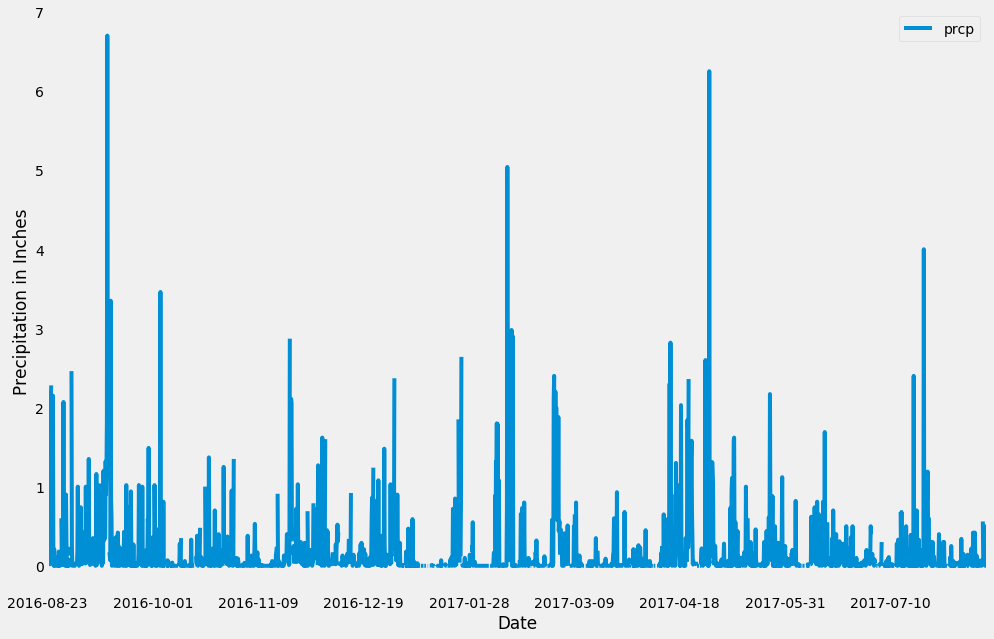

In [147]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Precipitation in Inches')
plt.grid()
plt.savefig("prcp_analysis.png")

In [83]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

### Station Analysis

In [79]:
# Design a query to show how many stations are available in this dataset?
station = session.query(func.count(Station.station)).all()
station_count=station
station_count

[(9)]

In [95]:
# List the stations and the counts in descending order.
active_stations=session.query(Station.station, func.count(Station.id)).\
    filter(Station.station == Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Station.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [126]:
# Lowest temperature recorded
low_temp=session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").\
    group_by(Measurement.station).all()
low_temp

[(54.0)]

In [127]:
# Maximum temperature recorded
max_temp=session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").\
    group_by(Measurement.station).all()
max_temp

[(85.0)]

In [128]:
# Average temperature recorded
avg_temp=session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").\
    group_by(Measurement.station).all()
avg_temp

[(71.66378066378067)]

In [136]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station 
temp_station=session.query(Measurement.station,Measurement.tobs).\
        filter(Measurement.station == "USC00519281").\
        filter( Measurement.date >= '2016-08-23').all()
temp_station

[('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281',

In [138]:
# Create DataFrame from station temperature data
temp_station=pd.DataFrame(session.query(Measurement.station,Measurement.tobs).\
        filter(Measurement.station=="USC00519281").\
        filter( Measurement.date >'2016-08-23').all())
temp_station

station  tobs
0    USC00519281  77.0
1    USC00519281  80.0
2    USC00519281  80.0
3    USC00519281  75.0
4    USC00519281  73.0
5    USC00519281  78.0
6    USC00519281  77.0
7    USC00519281  78.0
8    USC00519281  80.0
9    USC00519281  80.0
10   USC00519281  78.0
11   USC00519281  78.0
12   USC00519281  78.0
13   USC00519281  73.0
14   USC00519281  74.0
15   USC00519281  80.0
16   USC00519281  79.0
17   USC00519281  77.0
18   USC00519281  80.0
19   USC00519281  76.0
20   USC00519281  79.0
21   USC00519281  75.0
22   USC00519281  79.0
23   USC00519281  78.0
24   USC00519281  79.0
25   USC00519281  78.0
26   USC00519281  78.0
27   USC00519281  76.0
28   USC00519281  74.0
29   USC00519281  77.0
..           ...   ...
321  USC00519281  72.0
322  USC00519281  74.0
323  USC00519281  74.0
324  USC00519281  76.0
325  USC00519281  80.0
326  USC00519281  80.0
327  USC00519281  76.0
328  USC00519281  76.0
329  USC00519281  76.0
330  USC00519281  77.0
331  USC00519281  77.0
332  USC00519281  77.0
333  USC00519281  82.0
334  USC00519281  75.0
335  USC00519281  77.0
336  USC00519281  75.0
337  USC00519281  76.0
338  USC00519281  81.0
339  USC00519281  82.0
340  USC00519281  81.0
341  USC00519281  76.0
342  USC00519281  77.0
343  USC00519281  82.0
344  USC00519281  83.0
345  USC00519281  77.0
346  USC00519281  77.0
347  USC00519281  77.0
348  USC00519281  76.0
349  USC00519281  76.0
350  USC00519281  79.0

[351 rows x 2 columns]

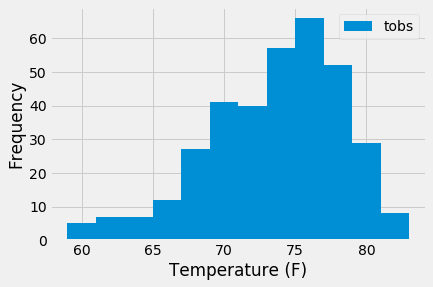

In [146]:
x=temp_station["tobs"]
plt.hist(x, bins=12)
plt.legend(['tobs'])
plt.ylabel('Frequency')
plt.xlabel('Temperature (F)')
plt.savefig("station_temp_data.png")
plt.show()

In [157]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2017-01-01', '2017-01-10'))

[(60.0, 68.0327868852459, 77.0)]


In [158]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2016-01-01', '2016-01-10'))

[(62.0, 70.30508474576271, 78.0)]


In [159]:
# Alternate method to check accuracy of trip data - 1 year
start = dt.date(2017, 1, 1) - dt.timedelta(days=365)
end = dt.date(2017, 1, 10) - dt.timedelta(days=365)

tmin, tavg, tmax = calc_temps(start.strftime("%Y-%m-%d"), end.strftime("%Y-%m-%d"))[0]
# Print tmin, tavg, tmax functions
print(tmin, tavg, tmax)

62.0 70.40677966101696 78.0


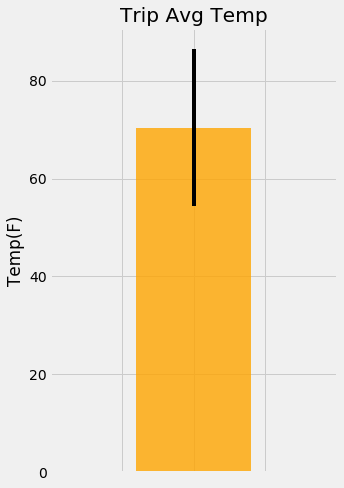

In [172]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots(figsize=(5,7))
ax.bar(x=1, height= tavg, yerr=tmax-tmin, align='center', color='orange', alpha=0.8)
ax.set_xlim(0,2)
ax.set_xticklabels('')
ax.set_title('Trip Avg Temp')
ax.set_ylabel('Temp(F)')
plt.tight_layout()
plt.savefig("temp_analysis.png", bbox_inches='tight')
plt.show()

In [174]:
session.query(Station.station,  Station.name, Station.latitude, Station.longitude, Station.elevation).\
   filter(Station.station == Measurement.station).\
       filter(Measurement.date >= start).filter(Measurement.date <= end).\
           group_by(Measurement.station).\
               order_by(Measurement.prcp.desc()).all()

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)]